<a href="https://colab.research.google.com/github/16siddhanth/Leveraging-Advanced-Computer-Technologies-for-Converting-Vegetable-Waste-into-Nutritious-Animal-Feed/blob/main/nutrient_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      335 non-null    object 
 1   Measure   335 non-null    object 
 2   Grams     335 non-null    int64  
 3   Calories  334 non-null    float64
 4   Protein   334 non-null    float64
 5   Fat       335 non-null    int64  
 6   Sat.Fat   333 non-null    float64
 7   Fiber     334 non-null    float64
 8   Carbs     335 non-null    float64
 9   Category  335 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 26.3+ KB
None

Missing Values per Column:
Food        0
Measure     0
Grams       0
Calories    1
Protein     1
Fat         0
Sat.Fat     2
Fiber       1
Carbs       0
Category    0
dtype: int64

Summary Statistics:
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  334.000000  335.000000  333.000000   
mean

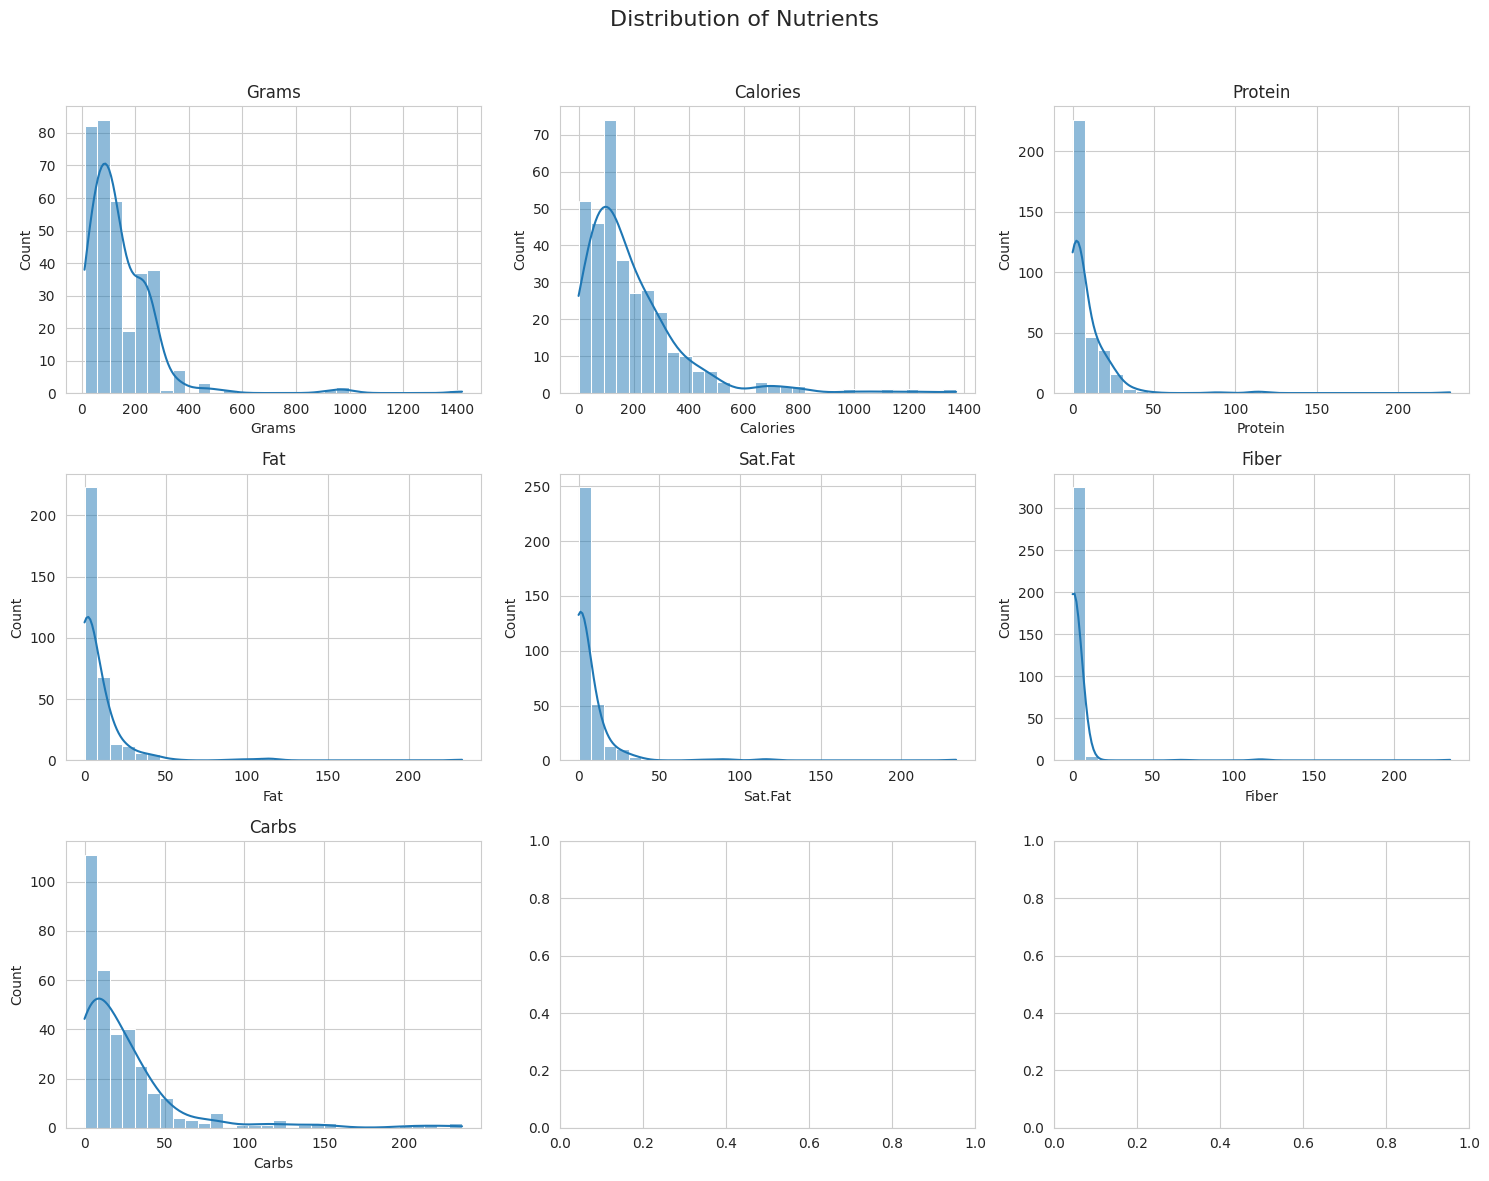

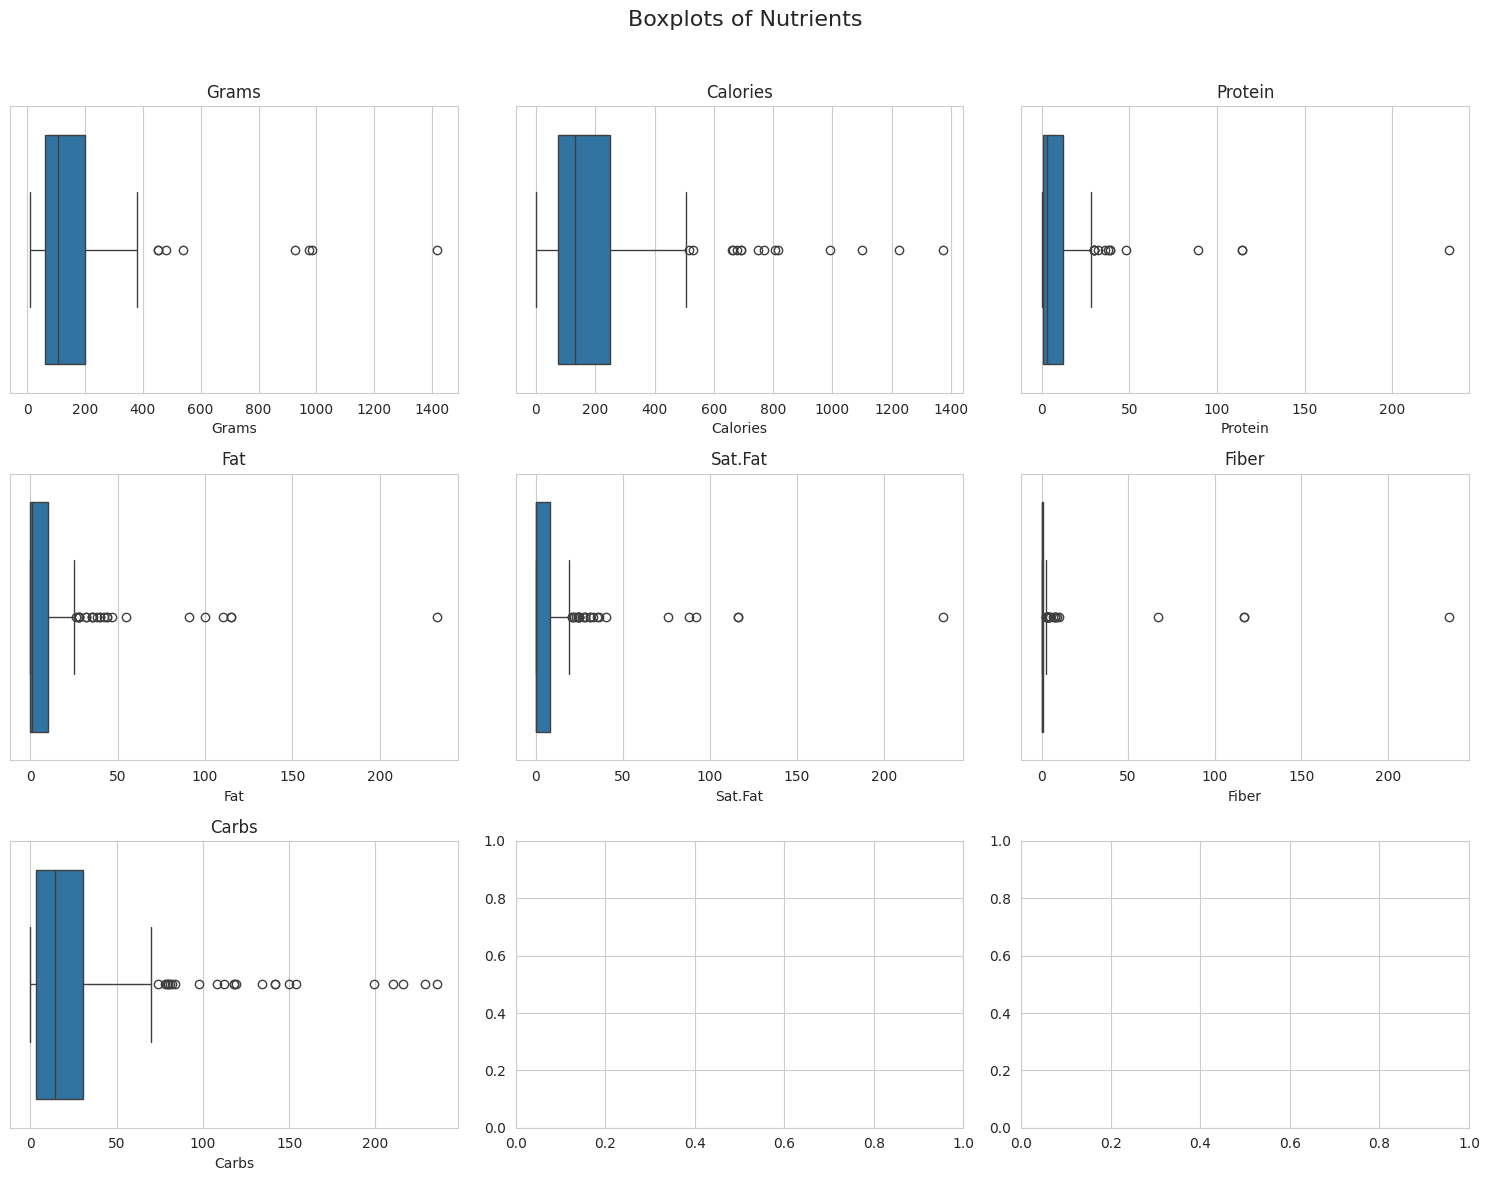

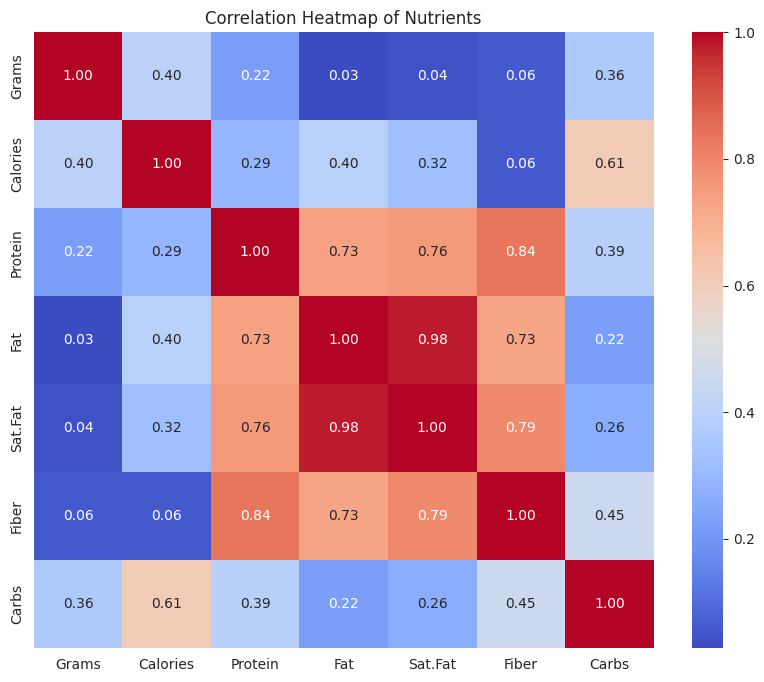


Average Nutrients per Food Category:
                                       Grams    Calories    Protein  \
Category                                                              
Seeds and Nuts                     56.833333  340.750000  10.000000   
Dairy products                    264.714286  301.214286  17.964286   
Meat, Poultry                      92.800000  266.633333  18.300000   
Breads, cereals, fastfood,grains  116.733333  264.911111   8.955556   
Fats, Oils, Shortenings            49.642857  259.214286  16.714286   
Desserts, sweets                  102.000000  227.862069   2.689655   
Jams, Jellies                      52.750000  168.125000   0.000000   
Fruits R-Z                        246.625000  153.500000   0.875000   
Fish, Seafood                      99.578947  153.263158  31.894737   
Fruits A-F                        174.727273  151.272727   1.318182   
Fruits G-P                        193.285714  144.785714   1.000000   
Soups                             249.5

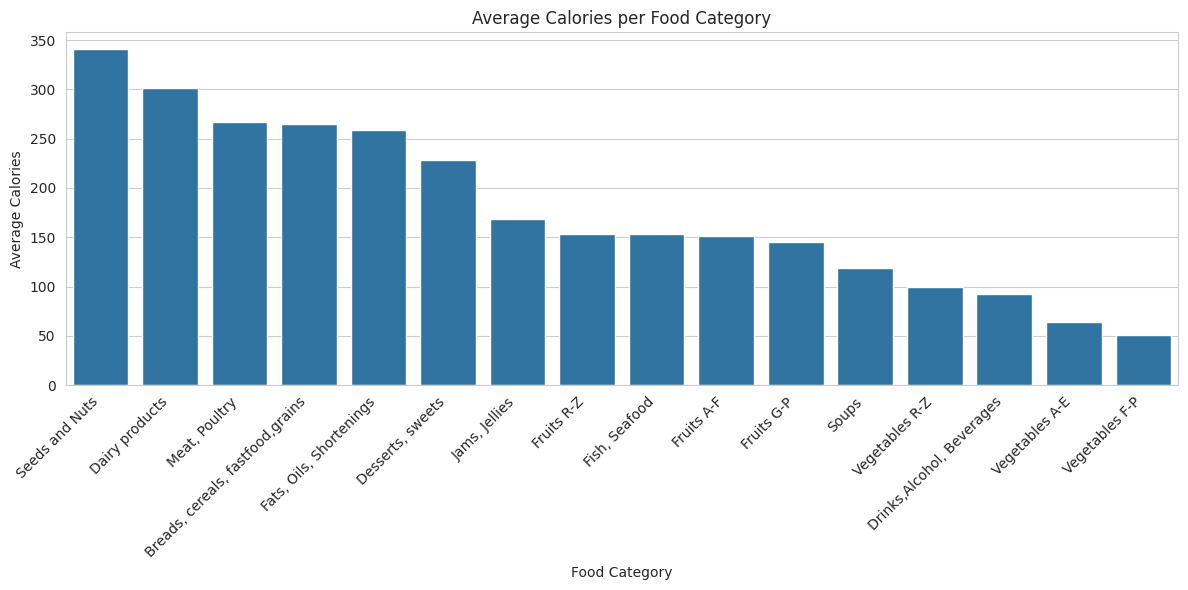

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load the Data
# -------------------------------
file_path = "/content/drive/MyDrive/Colab Notebooks/nutrient_analysis/food-nutrients.csv"
df = pd.read_csv(file_path)

# -------------------------------
# 2. Data Cleaning
# -------------------------------
# Define numeric columns to clean and convert
numeric_cols = ["Grams", "Calories", "Protein", "Fat", "Sat.Fat", "Fiber", "Carbs"]

# Replace non-numeric entries:
# - Assume "t" or "t'" stands for trace amounts -> set as 0.
# - Replace "a" and "-1" with NaN (indicating missing/erroneous data)
# - Handle range in Calories (e.g., "8-44") by taking the average.
df.replace({"t": 0, "t'": 0, "a": np.nan, "-1": np.nan}, inplace=True)
df["Calories"] = df["Calories"].replace("8-44", (8 + 44) / 2)

# Remove commas from numeric columns if present, then convert to numeric
df[numeric_cols] = df[numeric_cols].replace({",": ""}, regex=True).apply(pd.to_numeric, errors='coerce')

# -------------------------------
# 3. Basic EDA Outputs
# -------------------------------
# 3.1 Data Info and Missing Values
print("Data Info:")
print(df.info())
print("\nMissing Values per Column:")
print(df.isnull().sum())

# 3.2 Summary Statistics for Numeric Columns
print("\nSummary Statistics:")
print(df[numeric_cols].describe())

# 3.3 Count of Unique Categories
print("\nFood Categories Count:")
print(df['Category'].value_counts())

# -------------------------------
# 4. Visualization
# -------------------------------
sns.set_style("whitegrid")

# 4.1 Distribution Plots for Each Numeric Column
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Distribution of Nutrients", fontsize=16)
for i, col in enumerate(numeric_cols):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 4.2 Boxplots to check for outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Boxplots of Nutrients", fontsize=16)
for i, col in enumerate(numeric_cols):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 4.3 Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Nutrients")
plt.show()

# 4.4 Category-wise Analysis: Average Nutrient Values per Food Category
category_nutrients = df.groupby("Category")[numeric_cols].mean().sort_values(by="Calories", ascending=False)
print("\nAverage Nutrients per Food Category:")
print(category_nutrients)

# Optional: Visualize the average calories per category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_nutrients.index, y=category_nutrients["Calories"])
plt.title("Average Calories per Food Category")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Food Category")
plt.ylabel("Average Calories")
plt.tight_layout()
plt.show()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      335 non-null    object 
 1   Measure   335 non-null    object 
 2   Grams     335 non-null    int64  
 3   Calories  334 non-null    float64
 4   Protein   334 non-null    float64
 5   Fat       335 non-null    int64  
 6   Sat.Fat   333 non-null    float64
 7   Fiber     334 non-null    float64
 8   Carbs     335 non-null    float64
 9   Category  335 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 26.3+ KB
None

Missing Values per Column:
Food        0
Measure     0
Grams       0
Calories    1
Protein     1
Fat         0
Sat.Fat     2
Fiber       1
Carbs       0
Category    0
dtype: int64

Summary Statistics:
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  334.000000  335.000000  333.000000   
mean

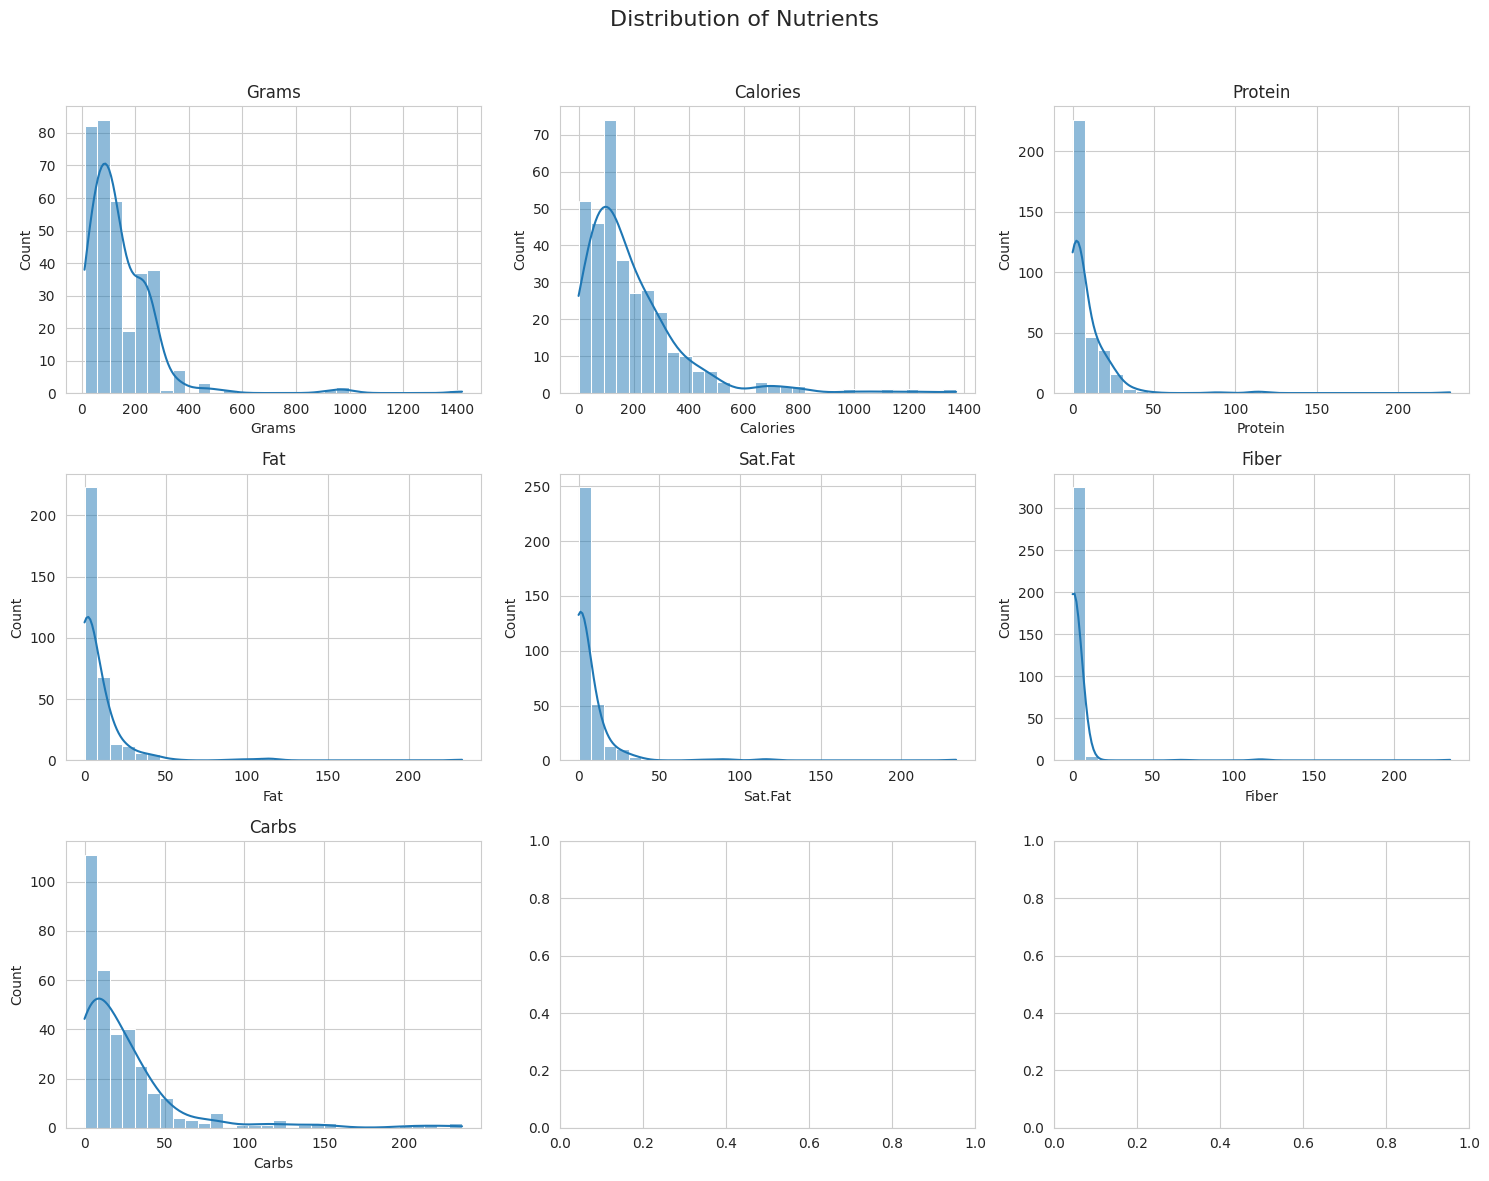

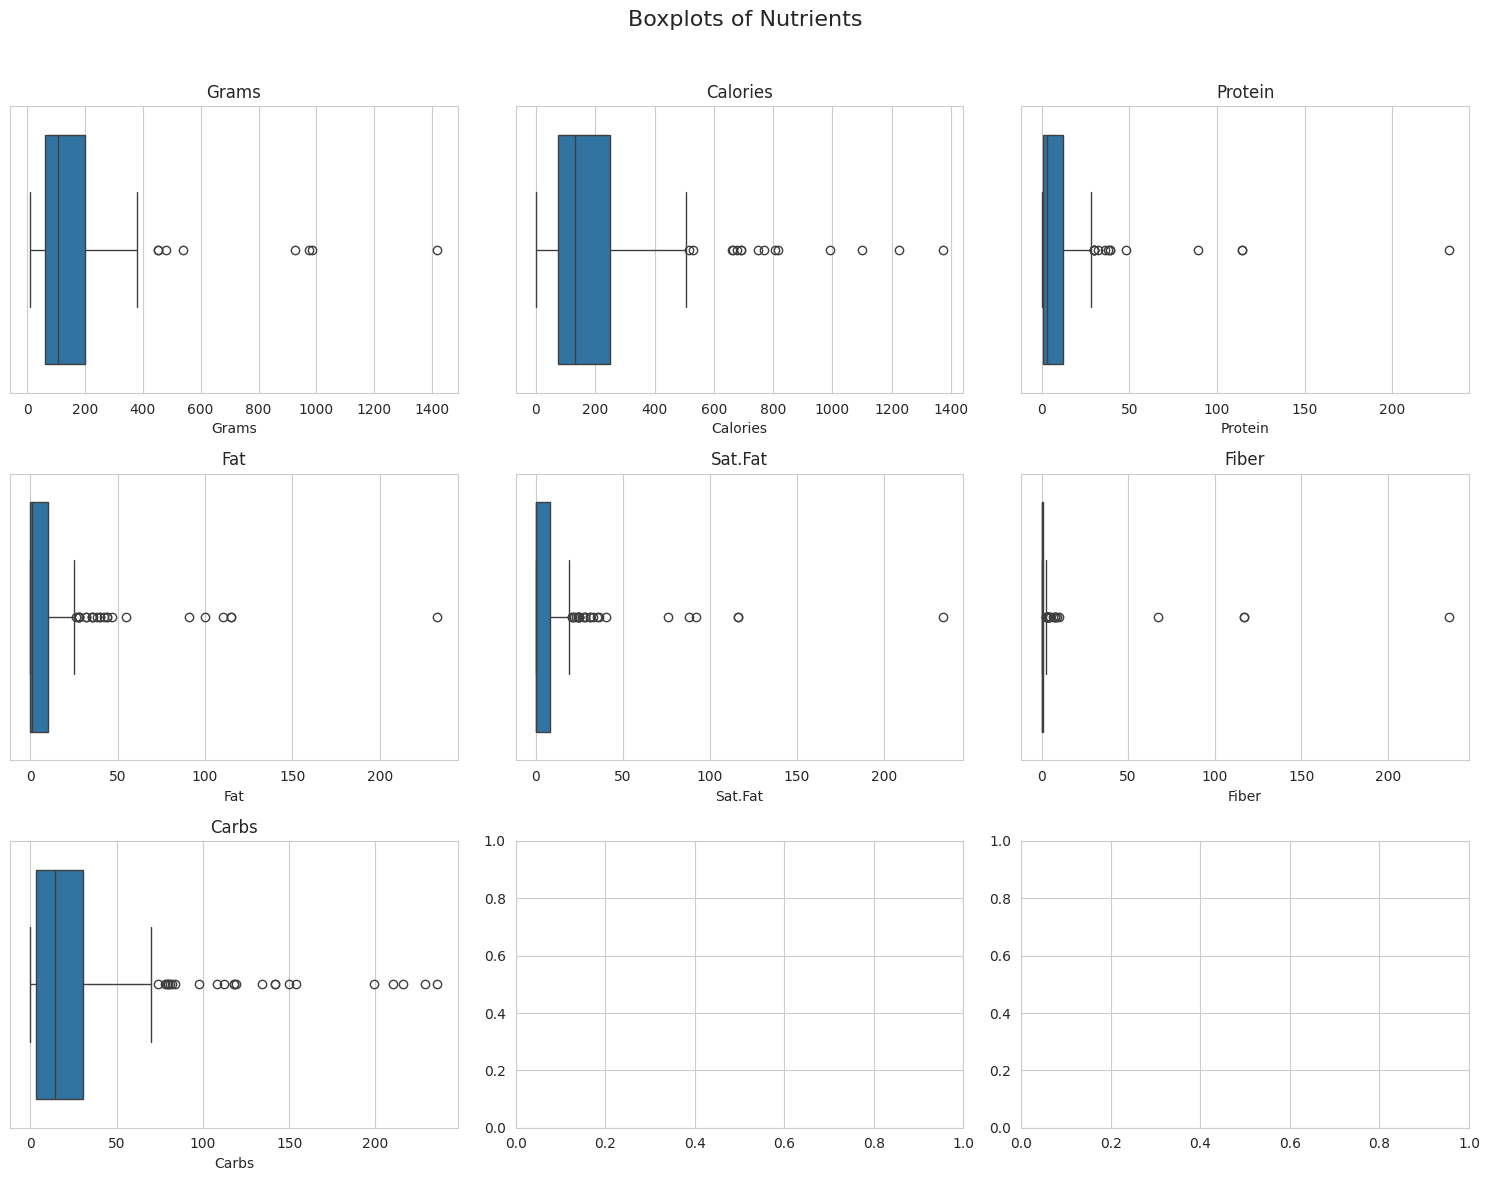

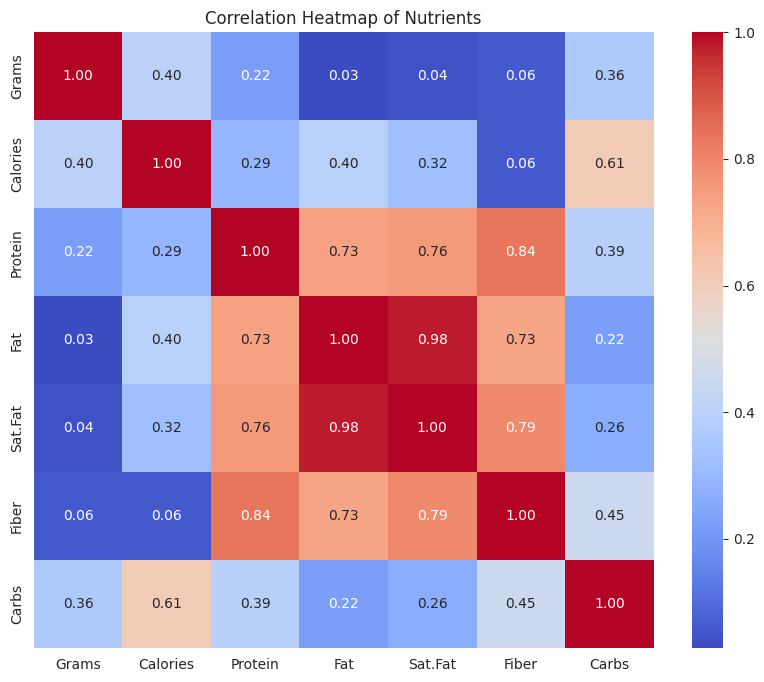


Average Nutrients per Food Category:
                                       Grams    Calories    Protein  \
Category                                                              
Seeds and Nuts                     56.833333  340.750000  10.000000   
Dairy products                    264.714286  301.214286  17.964286   
Meat, Poultry                      92.800000  266.633333  18.300000   
Breads, cereals, fastfood,grains  116.733333  264.911111   8.955556   
Fats, Oils, Shortenings            49.642857  259.214286  16.714286   
Desserts, sweets                  102.000000  227.862069   2.689655   
Jams, Jellies                      52.750000  168.125000   0.000000   
Fruits R-Z                        246.625000  153.500000   0.875000   
Fish, Seafood                      99.578947  153.263158  31.894737   
Fruits A-F                        174.727273  151.272727   1.318182   
Fruits G-P                        193.285714  144.785714   1.000000   
Soups                             249.5

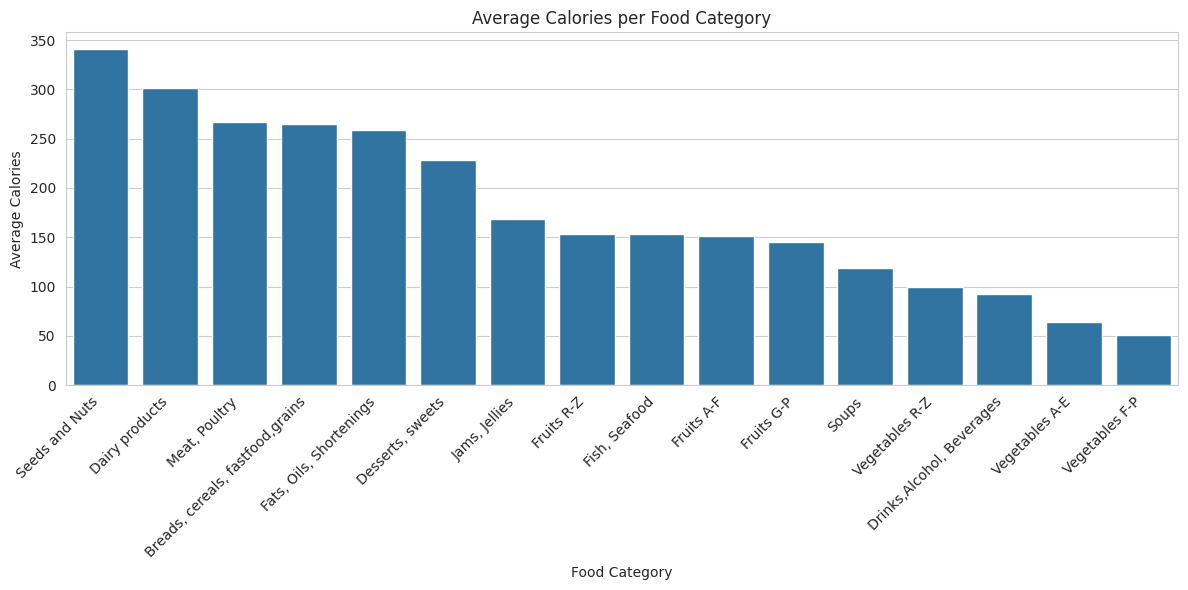

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# -------------------------------
# 1. Load the Data
# -------------------------------
file_path = "/content/drive/MyDrive/Colab Notebooks/nutrient_analysis/food-nutrients.csv"
df = pd.read_csv(file_path)

# -------------------------------
# 2. Data Cleaning
# -------------------------------
# Define numeric columns to clean and convert
numeric_cols = ["Grams", "Calories", "Protein", "Fat", "Sat.Fat", "Fiber", "Carbs"]

# Replace non-numeric entries:
# - Assume "t" or "t'" stands for trace amounts -> set as 0.
# - Replace "a" and "-1" with NaN (indicating missing/erroneous data)
# - Handle range in Calories (e.g., "8-44") by taking the average.
df.replace({"t": 0, "t'": 0, "a": np.nan, "-1": np.nan}, inplace=True)
df["Calories"] = df["Calories"].replace("8-44", (8 + 44) / 2)

# Remove commas from numeric columns if present, then convert to numeric
df[numeric_cols] = df[numeric_cols].replace({",": ""}, regex=True).apply(pd.to_numeric, errors='coerce')

# -------------------------------
# 3. Basic EDA Outputs
# -------------------------------
# Print Data Info and Missing Values
print("Data Info:")
print(df.info())

print("\nMissing Values per Column:")
print(df.isnull().sum())

# Print Summary Statistics for Numeric Columns
print("\nSummary Statistics:")
print(df[numeric_cols].describe())

# Count of Unique Food Categories
print("\nFood Categories Count:")
print(df['Category'].value_counts())

# -------------------------------
# 4. Visualization
# -------------------------------
# 4.1 Distribution Plots for Numeric Columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Distribution of Nutrients", fontsize=16)
for i, col in enumerate(numeric_cols):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 4.2 Boxplots to Check for Outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Boxplots of Nutrients", fontsize=16)
for i, col in enumerate(numeric_cols):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 4.3 Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Nutrients")
plt.show()

# 4.4 Category-wise Analysis: Average Nutrient Values per Food Category
category_nutrients = df.groupby("Category")[numeric_cols].mean().sort_values(by="Calories", ascending=False)
print("\nAverage Nutrients per Food Category:")
print(category_nutrients)

# Optional: Visualize the Average Calories per Category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_nutrients.index, y=category_nutrients["Calories"])
plt.title("Average Calories per Food Category")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Food Category")
plt.ylabel("Average Calories")
plt.tight_layout()
plt.show()


In [35]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For image processing and feature extraction
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# For model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# -------------------------------
# 1. Load and Prepare the Data
# -------------------------------
# Load your nutrient dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/nutrient_analysis/food-nutrients.csv"
df = pd.read_csv(file_path)

# Data cleaning (assuming you've already done cleaning similar to step 2 earlier)
numeric_cols = ["Grams", "Calories", "Protein", "Fat", "Sat.Fat", "Fiber", "Carbs"]
import numpy as np
df.replace({"t": 0, "t'": 0, "a": np.nan, "-1": np.nan}, inplace=True)
df["Calories"] = df["Calories"].replace("8-44", (8 + 44) / 2)
df[numeric_cols] = df[numeric_cols].replace({",": ""}, regex=True).apply(pd.to_numeric, errors='coerce')

# For demonstration, assume we generate image paths based on food names.
# Replace this logic with your actual image paths.
df['Image_Path'] = "/content/food_images/" + df['Food'].str.replace(" ", "_") + ".jpg"

# -------------------------------
# 2. Extract Image Features using VGG16
# -------------------------------
# Load pre-trained VGG16 (excluding top layers) with global average pooling
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path, model, target_size=(224, 224)):
    try:
        img = image.load_img(img_path, target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        return features.flatten()
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

# Extract features for each image in the dataset
features_list = []
valid_indices = []
for idx, row in df.iterrows():
    feat = extract_features(row['Image_Path'], base_model)
    if feat is not None:
        features_list.append(feat)
        valid_indices.append(idx)

# Keep only the rows with successfully extracted image features
X_features = np.array(features_list)
df_valid = df.loc[valid_indices].reset_index(drop=True)

# -------------------------------
# 3. Prepare Target Nutrient Values
# -------------------------------
# Define target nutrient columns (you can choose a subset if needed)
target_cols = ["Calories", "Protein", "Fat", "Sat.Fat", "Fiber", "Carbs"]

# Drop rows with missing target values
df_valid = df_valid.dropna(subset=target_cols)
y_targets = df_valid[target_cols].values

# -------------------------------
# 4. Train a Multi-Output Regression Model
# -------------------------------
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_targets, test_size=0.2, random_state=42)

# Initialize and train the multi-output regression model
regressor = MultiOutputRegressor(RandomForestRegressor(random_state=42))
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", mse)

# -------------------------------
# 5. (Optional) Visualize Predictions vs Actual
# -------------------------------
# For instance, plot actual vs predicted Calories for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.7)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories")
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()],
         [y_test[:, 0].min(), y_test[:, 0].max()], 'r--')
plt.show()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Error processing /content/food_images/Cows'_milk.jpg: [Errno 2] No such file or directory: "/content/food_images/Cows'_milk.jpg"
Error processing /content/food_images/Milk_skim.jpg: [Errno 2] No such file or directory: '/content/food_images/Milk_skim.jpg'
Error processing /content/food_images/Buttermilk.jpg: [Errno 2] No such file or directory: '/content/food_images/Buttermilk.jpg'
Error processing /content/food_images/Evaporated,_undiluted.jpg: [Errno 2] No such file or directory: '/content/food_images/Evaporated,_undiluted.jpg'
Error processing /content/food_images/Fortified_milk.jpg: [Errno 2] No such file or directory: '/content/food_images/Fortified_milk.jpg'
Error processing /content/food_images/Powdered_milk.jpg: [Errno 2] No such file or directory: '/content/food_images/Powdered_milk.jpg'
Error processing /content/food_images/skim,_instant.jpg: [Errno 2] No such file or directory: '/content/food_images/skim,_instant.jpg'
Error 

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.